In [1]:
import urllib.request
from bs4 import BeautifulSoup
import re
import json

legislation_list_path = 'data/council_key_legislation_1000sample_voteURLs.json'
with open(legislation_list_path,'r') as infile:
    legislation_records = json.load(infile)
print(legislation_records)

base_url = 'https://chicago.legistar.com/'

[{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3483778&GUID=8E37E83E-FD21-4544-BBD7-C6AF981411CA&Options=Advanced&Search=', 'name': 'O2018-3823', 'category': 'Ordinance', 'action': 'Introduced', 'introduction_date': '4/18/2018', 'sponsor': 'Mayor', 'description': 'Appropriation of proceeds from sale of properties at 1685 N Throop St and portion of S Wentworth Ave to fund design, construction and associated costs for Department of Fleet an Facility Management facilities and Public Safety Training, Academy, development of 3-1-1 System, and associated real estate brokerage fees'}, {'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3481819&GUID=A04D5A3E-A4A8-41E0-98EC-0DC8ABAB3BD5&Options=Advanced&Search=', 'name': 'O2018-3799', 'category': 'Ordinance', 'action': 'Introduced', 'introduction_date': '4/18/2018', 'sponsor': 'Mayor', 'description': 'Revision to redevelopment agreement with and associated Class 6(b) tax status for The Keebl

In [2]:
import numpy as np
import pandas as pd

# init
initialized = False
council_people = []
bill_names = []
bill_idx = -1

# key: Yea = 1  Nay = -1  Did Not Vote = 0  Absent = 0

for record in legislation_records:
    
    bill_name = record['name']
    print(bill_name)
    print(record['description'])
    
    # check for bills where a council vote occurrd
    if 'vote_url' in record.keys():
        if record['vote_url']=='no vote found':
            print('no vote found')
        else:
            
            print(record)
            print('contains vote url')             
            bill_names.append(bill_name)
            bill_idx += 1

            with urllib.request.urlopen(record['vote_url']) as response:
                page = response.read()
                soup = BeautifulSoup(page, 'html.parser')
                #print(soup.prettify())

                rows = soup.findAll(True, {"class":["rgRow", "rgAltRow"]})
                votes_record = []
                ward_id = 0

                if not initialized:  # get column names (council-people) and prepare the data array
                    print("initializing")
                    for row in rows:
                        name = row.a.text
                        council_people.append(name) # these are in ward order, which is convenient
                    vote_matrix = np.zeros((len(legislation_records),len(council_people)))
                    initialized = True;

                for person_idx,row in enumerate(rows):
                    #name = row.a.text
                    vote = row.find_all('td')[1].text
                    print(vote)
                    if vote=='Yea':
                        val = 1
                    elif vote=='Nay':
                        val = 0
                    elif vote=='Did Not Vote':
                        val = 0
                    elif vote=='Absent':
                        val = 0
                    elif vote=='Recused':
                        val = 0
                    else:
                        vote = -1 # warning
                        print('WARNING: unexpected vote value')
                    vote_matrix[bill_idx, person_idx] = val      
    else:
        print('no vote, introduction only') 
        
vote_matrix = vote_matrix[:bill_idx+1,:] # trim off the zeros corresponding to bills that didn't have votes
        
print('wrangled data:')
print(len(council_people))
print(len(bill_names))
print(len(vote_matrix))

print('constructing pandas dataframe...')
votes_dataframe = pd.DataFrame(data=vote_matrix, index=bill_names, columns=council_people)
print(votes_dataframe)
    

O2018-3823
Appropriation of proceeds from sale of properties at 1685 N Throop St and portion of S Wentworth Ave to fund design, construction and associated costs for Department of Fleet an Facility Management facilities and Public Safety Training, Academy, development of 3-1-1 System, and associated real estate brokerage fees
no vote, introduction only
O2018-3799
Revision to redevelopment agreement with and associated Class 6(b) tax status for The Keebler Company for property at 750 E 110th St, 10839 S Langley Ave and 10840-10841 S Langley Ave
no vote, introduction only
O2018-3798
Zoning Reclassification Map No. 9-G at 3469-3475 N Clark St - App No. 19648 
no vote, introduction only
O2018-3797
Zoning Reclassification Map No. 4-I at  1256-1368 S Talman Ave, 1257-1411 S Washtenaw Ave, 1348-1412 S Fairfield Ave, 1355-1365 S Talman Ave, 2604-2726 W Ogden Ave and 2703-2724 W 14th St - App No. 19647
no vote, introduction only
O2018-3796
Zoning Reclassification Map No. 7-G at 821 W Oakdale Av

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2946
Zoning Reclassification Map No. 5-G at 1428-1472 W Willow St/1731-1747 N Elston Ave - App No. 19613T1
no vote, introduction only
O2018-2784
Zoning Reclassification Map No. 8-H at 2000 W 34th St - 19612T1
no vote, introduction only
O2018-2765
Establishment of work group to maximize diversity in project participation associated with new lease and license agreements with various air carriers at Chicago O’Hare International Airport
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3463461&GUID=26211BE3-AA2D-45B2-B3E6-10FC63F2C874&Options=Advanced&Search=', 'name': 'O2018-2765', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/27/2018', 'sponsor': '03', 'description': 'Establishment of work group to maximize diversity in project participa

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2436
Amendment of Municipal Code Title 2 by adding new Chapter 2-76 entitled "Chicago Community Police Commission" and modifying Chapters 2-56 and 2-78 concerning Public Safety Deputy
no vote, introduction only
O2018-2428
Sublease agreement with Catholic Charities of the Archdiocese of Chicago for property at 2400 S Kedzie Ave
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3462719&GUID=F75BC2B9-466E-47B7-8D08-ACF2EAAC6A94&Options=Advanced&Search=', 'name': 'O2018-2428', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/28/2018', 'sponsor': 'Mayor', 'description': 'Sublease agreement with Catholic Charities of the Archdiocese of Chicago for property at 2400 S Kedzie Ave', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2373
Sale of City-owned property at 5008 S Aberdeen St to Salvador Salas Cesena
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3462429&GUID=94C7D175-8093-40E1-A48A-BF72EBCC69D2&Options=Advanced&Search=', 'name': 'O2018-2373', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/28/2018', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property at 5008 S Aberdeen St to Salvador Salas Cesena', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15113394&GUID=A28A8D4A-32E7-429B-AA1C-AE076749C44A'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2371
Z

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2018-31
Appointment of Paul L. Leamon as member of Special Service Area No. 27, West Lakeview Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3462159&GUID=04866914-9A06-4977-9633-A8DCE298E10B&Options=Advanced&Search=', 'name': 'A2018-31', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '3/28/2018', 'sponsor': 'Mayor', 'description': 'Appointment of Paul L. Leamon as member of Special Service Area No. 27, West Lakeview Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15120236&GUID=1349BAF8-3F36-45D0-BDB4-2D9543343104'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2348
Support of Class L tax incentive for property(s) at 911-915 W Randolph St
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3462148&GUID=7240190A-842B-458B-A8F4-C5F75BC12FC5&Options=Advanced&Search=', 'name': 'O2018-2348', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/28/2018', 'sponsor': 'Mayor', 'description': 'Support of Class L tax incentive for property(s) at 911-915 W Randolph St', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15120246&GUID=6F0DE9A3-DFC6-4D8A-9984-5C4B33409A88'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2347
Sup

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-2339
Amendment of Municipal Code Chapters 2-116 and 17-14 regarding Zoning Board of Appeals creation and membership
no vote, introduction only
O2018-2338
Amendment of Municipal Code Section 2-92-340 regarding prequalification of contractors bidding for expedited bridge or viaduct repair
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3462138&GUID=D4D582E8-0B54-4936-8082-AA076561B4CD&Options=Advanced&Search=', 'name': 'O2018-2338', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/28/2018', 'sponsor': 'Mayor', 'description': 'Amendment of Municipal Code Section 2-92-340 regarding prequalification of contractors bidding for expedited bridge or viaduct repair', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15128407&GUID=3C

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-1888
Zoning Reclassification Map No. 9-H at 3728 N Ashland Ave - App No. 19571
no vote, introduction only
O2018-1887
Zoning Reclassification Map No. 4-H at 1713 W Cullerton St - App No. 19570
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3359024&GUID=18CD0168-4EF2-4472-B0D0-8FFCE8EA0B77&Options=Advanced&Search=', 'name': 'O2018-1887', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '2/28/2018', 'sponsor': 'Misc.', 'description': 'Zoning Reclassification Map No. 4-H at 1713 W Cullerton St - App No. 19570', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15037018&GUID=850BDA30-31AC-40D6-966A-34FDE53CED0E'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2018-1875
Zoning Reclassification Map No. 3-I at 1512 N Rockwell St - App No. 19565T1
no vote found
O2018-1874
Sale of City-owned property at 2427-2431 W 14th St to 1414 S. Western LLC
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3358798&GUID=266D3B52-C7FF-46A4-A52F-03DB44E427F0&Options=Advanced&Search=', 'name': 'O2018-1874', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '2/28/2018', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property at 2427-2431 W 14th St to 1414 S. Western LLC', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15012664&GUID=099A2D02-B5FF-4F9A-BCAA-17E3FEF91322'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Abs

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-1217
Expenditure of Open Space Impact Fee funds and grant agreement with NeighborSpace for street-end River Education Platform within Wild Mile Area 
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3357931&GUID=F7A926DE-527A-422C-94C9-69F6DE9EC714&Options=Advanced&Search=', 'name': 'O2018-1217', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '2/28/2018', 'sponsor': 'Mayor', 'description': 'Expenditure of Open Space Impact Fee funds and grant agreement with NeighborSpace for street-end River Education Platform within Wild Mile Area ', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15013816&GUID=9E719677-C46C-4984-B36D-6A885F0A398D'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-1003
Zoning Reclassification Map No. 9-G at 1101-1115 W Addison St - App No. 19546
no vote, introduction only
O2018-990
Amendment of Municipal Code Section 2-32-520 concerning Cty's authorized investments in various industries and companies and adding new Section 2-32-521 entitled "Environmental, Social and Governance Investments" 
no vote, introduction only
O2018-984
Amendment of Municipal Code Section 4-156-305 concerning public place of amusement license requirements for operating strategy-based room escape games
no vote, introduction only
O2018-977
Amendment of Municipal Code Section 4-4-210 by requiring licensed businesses to display 24-hour emergency contact information and adding new Section 4-4-318 requiring surveillance cameras for certain late-night retail businesses


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2018-913
Amendment of Municipal Code Section 9-68-025 by further regulating Soldier Field/Wintrust Arena area parking permits
no vote found
O2018-912
Amendment of Municipal Code Section 17-3-503-D by changing pedestrian street designation on portions of W 18th St
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3357126&GUID=9DB8217D-1B70-4FDC-98CA-1429B47ECCCC&Options=Advanced&Search=', 'name': 'O2018-912', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '2/28/2018', 'sponsor': '25', 'description': 'Amendment of Municipal Code Section 17-3-503-D by changing pedestrian street designation on portions of W 18th St', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15126631&GUID=A124551D-E69C-4ADF-AB23-ED9E1B7A99B6'}
contains 

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-894
Zoning Reclassification Map No. 9-H at 1756  W Cornelia Ave - App No. 19537
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3356414&GUID=F84868C9-814D-4EA9-BD9A-ED2C2197C48C&Options=Advanced&Search=', 'name': 'O2018-894', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '2/28/2018', 'sponsor': 'Misc.', 'description': 'Zoning Reclassification Map No. 9-H at 1756  W Cornelia Ave - App No. 19537', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15036969&GUID=A9EE6734-663E-43D5-A967-44473BDBABF3'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-863
Zoning Reclassification Map No. 22-C at 9329-9429 S Stony Island Ave - App No. 19526
no vote, introduction only
F2018-13
Notification of sale regarding Sales Tax Securitization Corporation and Sales Tax Securitization Bonds, Series 2018
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3353134&GUID=17E1E580-4487-4ED4-8DAC-89AC7B6CABDE&Options=Advanced&Search=', 'name': 'F2018-13', 'category': 'Communication', 'action': 'Placed on File', 'introduction_date': '2/28/2018', 'sponsor': '\xa0', 'description': 'Notification of sale regarding Sales Tax Securitization Corporation and Sales Tax Securitization Bonds, Series 2018', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14856726&GUID=AA8EC782-6621-42EB-9585-4FB92509F882'}
contains vote

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-663
Designation of Foster/Edens Redevelopment Project Area as redevelopment project area pursuant to Tax Increment Financing (TIF) Act
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3314622&GUID=C39C8CAC-4239-4B92-ABFB-B08E5E353DFD&Options=Advanced&Search=', 'name': 'O2018-663', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '1/17/2018', 'sponsor': 'Mayor', 'description': 'Designation of Foster/Edens Redevelopment Project Area as redevelopment project area pursuant to Tax Increment Financing (TIF) Act', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14875637&GUID=777C6751-A59A-4361-8BA0-623059B1E6EC'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-652
Fifty-third amending agreement with SomerCor 504, Inc. regarding administration of Small Business Improvement Fund (SBIF) program within Addison South, Fullerton/Milwaukee, Harlem Industrial Park Conservation, and Peterson/Pulaski projects
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3314423&GUID=FCE3EC0D-CD9E-4125-8CA0-7D64D63C1402&Options=Advanced&Search=', 'name': 'O2018-652', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '1/17/2018', 'sponsor': 'Mayor', 'description': 'Fifty-third amending agreement with SomerCor 504, Inc. regarding administration of Small Business Improvement Fund (SBIF) program within Addison South, Fullerton/Milwaukee, Harlem Industrial Park Conservation, and Peterson/Pulaski projects', 'vote_url': 'https:

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-624
Concession license agreement with City Winery Chicago LLC on Chicago Riverwalk
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3314268&GUID=B0EF5CF4-5130-4DC5-B489-621DD1DF50E5&Options=Advanced&Search=', 'name': 'O2018-624', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '1/17/2018', 'sponsor': 'Mayor', 'description': 'Concession license agreement with City Winery Chicago LLC on Chicago Riverwalk', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14858934&GUID=BE3FF618-ACBF-4D49-85D2-DF77A9D0B3F3'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2018

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-177
Amendment of Municipal Code Section 2-16-015 concerning powers and duties of executive director of Department of Animal Care and Control to enter into grant agreements
no vote, introduction only
O2018-176
Amendment of Municipal Code Sections 4-384-010 and 4-384-020 concerning animal care license requirements for animal shelters
no vote, introduction only
O2018-175
Amendment of Municipal Code Chapter 2-16 by adding new Section 2-16-030 regarding quarterly operations reports by Department of Animal Care and Control
no vote, introduction only
SO2018-174
Zoning Reclassification Map No. 2-G at 1220 W Van Buren St - App No. 19501
no vote found
O2018-173
Amendment of Municipal Code Section 4-6-180 concerning hotel licensee's obligations to equip employees assigned to clean

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2018-133
Designation of 14th Precinct of 13th Ward as Restricted Residential Zone prohibiting additional shared housing units and vacation rentals
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3313174&GUID=B2A16E88-071A-46B8-8819-B05F9E05160F&Options=Advanced&Search=', 'name': 'O2018-133', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '1/17/2018', 'sponsor': '13', 'description': 'Designation of 14th Precinct of 13th Ward as Restricted Residential Zone prohibiting additional shared housing units and vacation rentals', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14861042&GUID=823393F2-CE3C-45D2-A680-D8B11E0A2ECE'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2018-6
Reappointment of Matthew S. Rogatz, Barry A. Rosenthal, Peter W. Testa and Lynette F. Wasielewski as members of Special Service Area No. 13, Stockyards Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3313126&GUID=22B9E2D5-1A52-4055-B417-53B508EFE3DE&Options=Advanced&Search=', 'name': 'A2018-6', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '1/17/2018', 'sponsor': 'Mayor', 'description': 'Reappointment of Matthew S. Rogatz, Barry A. Rosenthal, Peter W. Testa and Lynette F. Wasielewski as members of Special Service Area No. 13, Stockyards Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14875624&GUID=200C5676-AEC2-4129-923F-5A34D734ED87'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2017-9014
Zoning Reclassification Map No. 5-H at 2036 and 2038 W North Ave - Aoo No. 19490T1
no vote found
SO2017-9012
Zoning Reclassification Map No. 1-H at 2005 W Huron St - App No. 19489T1
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3295654&GUID=D37C2A24-20A3-40C1-95BE-BEB9899F127C&Options=Advanced&Search=', 'name': 'SO2017-9012', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '12/13/2017', 'sponsor': 'Misc.', 'description': 'Zoning Reclassification Map No. 1-H at 2005 W Huron St - App No. 19489T1', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14869718&GUID=1EA1A830-C6F7-46EE-882A-957F4221D4F2'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2017-8970
Lease agreement with Taylor Street LA LLC for use of building space at 1336 W Taylor St as Chicago Public Library Roosevelt branch
no vote found
O2017-8822
Lease agreement renewal with Cook County for use of space at 5333 N Western Ave for Cook County State's Attorney
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3293345&GUID=7670CFEB-2EFA-4FF7-814F-20AAF888DFBC&Options=Advanced&Search=', 'name': 'O2017-8822', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '12/13/2017', 'sponsor': 'Mayor', 'description': "Lease agreement renewal with Cook County for use of space at 5333 N Western Ave for Cook County State's Attorney", 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14664101&GUID=47623CCC-721F-4DFC-BCFE-288E3FF9E6B

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2017-8622
Amendment of Municipal Code Titles 2 and 9 concerning Free-Floating Vehicle Provider Pilot Program
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3292869&GUID=7676B876-0B12-4BBD-96C6-1C3ED15D734D&Options=Advanced&Search=', 'name': 'SO2017-8622', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '12/13/2017', 'sponsor': '01', 'description': 'Amendment of Municipal Code Titles 2 and 9 concerning Free-Floating Vehicle Provider Pilot Program', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=15005542&GUID=5ED4C753-A1ED-40C4-8856-7AD611B332C5'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Nay
Nay
Yea
Nay
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-8595
Amendment of Municipal Code Section 2-152-110 to entitle all City employees who served in U.S. military paid vacation day every November 11th in recognition of Veterans Day
no vote, introduction only
O2017-8592
Right of Entry continuation agreement with Board of Trustees of University of Illinois
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3292713&GUID=F38DC6EC-5BF4-492D-AF95-28D0B41B1B86&Options=Advanced&Search=', 'name': 'O2017-8592', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '12/13/2017', 'sponsor': 'Mayor', 'description': 'Right of Entry continuation agreement with Board of Trustees of University of Illinois', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14664096&GUID=D8E8AEB4-03B0-4733-8DEA-C1899412B

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-128
Appointment of Raul Garza as member of Chicago Plan Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3292622&GUID=330EE9CB-4993-4C4F-A3A6-652C96733E6D&Options=Advanced&Search=', 'name': 'A2017-128', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '12/13/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Raul Garza as member of Chicago Plan Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14664123&GUID=767CC326-9755-41CF-9A29-4D3915A69397'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-126
Reappoint

Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-8439
Sale of City-owned property at 4114-4120 W Chicago Ave to 4106 Chicago LLC
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3216854&GUID=F20861CB-26EE-4266-9E90-C2CB8E6902F6&Options=Advanced&Search=', 'name': 'O2017-8439', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '11/21/2017', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property at 4114-4120 W Chicago Ave to 4106 Chicago LLC', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14548017&GUID=B9985D01-9B2B-4BF7-A74A-C32A859D79E8'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-8415
Scope of services, budget and management agreement for Special Service Area No. 14
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3216184&GUID=DC16A326-4DAB-4E74-90FB-7FC9C18C69E7&Options=Advanced&Search=', 'name': 'O2017-8415', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '11/21/2017', 'sponsor': 'Mayor', 'description': 'Scope of services, budget and management agreement for Special Service Area No. 14', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14546473&GUID=3185A6CE-627E-48E0-9F2E-1D48F7BFF48C'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7934
Sale of City-owned property at 6515 S Rhodes Ave to Lola Gray under Adjacent Neighbors Land Acquisition Program
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3207339&GUID=5ED3A77F-015D-4FF3-AE08-0C987EA2F664&Options=Advanced&Search=', 'name': 'O2017-7934', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '11/8/2017', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property at 6515 S Rhodes Ave to Lola Gray under Adjacent Neighbors Land Acquisition Program', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14548013&GUID=6F215944-CE27-42D3-985A-6808ACC0A5E6'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7816
Amendment of Municipal Code Chapter 2-20 by adding new Section 2-20-050 concerning screening and testing of windows and doors installed under Midway and O'Hare Residential Sound Insulation Program
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3206633&GUID=078C7482-2597-402D-ACFE-E1FF92F4E57C&Options=Advanced&Search=', 'name': 'O2017-7816', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '11/8/2017', 'sponsor': '13', 'description': "Amendment of Municipal Code Chapter 2-20 by adding new Section 2-20-050 concerning screening and testing of windows and doors installed under Midway and O'Hare Residential Sound Insulation Program", 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14547801&GUID=F7D6E355-1D43-4852-9C0D-770B

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-120
Reappointment of Scott Onque as member of Special Service Area No. 49, the South Shore Exchange Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3206317&GUID=7D9B93DB-24E6-425A-BF48-35820D08AB1C&Options=Advanced&Search=', 'name': 'A2017-120', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '11/8/2017', 'sponsor': 'Mayor', 'description': 'Reappointment of Scott Onque as member of Special Service Area No. 49, the South Shore Exchange Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14436949&GUID=EEB7043A-5DDD-41B3-B296-F91729B78F4B'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7785
Scope of services, budget and management agreement for Special Service Area No. 33 (Year 2018)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3205770&GUID=1DA15F9A-FF85-4B29-9DFE-2E637C42F6E5&Options=Advanced&Search=', 'name': 'O2017-7785', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '11/8/2017', 'sponsor': 'Mayor', 'description': 'Scope of services, budget and management agreement for Special Service Area No. 33 (Year 2018)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14436961&GUID=81672B9F-4F90-4303-B25B-E2C7D1E76314'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
R2017-829
Call upon Chicago White Sox and Chicago Cubs to lead Major League Baseball in terms of protective practices and spectator safety precautions
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3185862&GUID=A61D9330-2BB6-4B1A-BA81-6416141B128B&Options=Advanced&Search=', 'name': 'R2017-829', 'category': 'Resolution', 'action': 'Adopted', 'introduction_date': '10/10/2017', 'sponsor': '14', 'description': 'Call upon Chicago White Sox and Chicago Cubs to lead Major League Baseball in terms of protective practices and spectator safety precautions', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14265552&GUID=2F05C2A2-4FBA-4BC2-AEA5-CECE0CA04507'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

O2017-7146
Amendment of Municipal Code Chapter 2-20 by adding new Section 2-20-045 entitled "Warranties under Midway and O'Hare Residential Sound Insulation Program"
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3184729&GUID=715CDBBD-CAB0-42C7-A4A5-20F2348F304C&Options=Advanced&Search=', 'name': 'O2017-7146', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '10/11/2017', 'sponsor': '13', 'description': 'Amendment of Municipal Code Chapter 2-20 by adding new Section 2-20-045 entitled "Warranties under Midway and O\'Hare Residential Sound Insulation Program"', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14547800&GUID=0DE94F79-8DCE-41A2-BDAA-083A9137C5C0'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-115
Appointment of Shobhana J. Verma as m

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-107
Appointment of Juan C. Avila as member of Board of Directors of Chicago Community Catalyst Fund
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3184710&GUID=A8DEEA0B-D5B9-4AD1-ACD5-9F70D4BD1AC2&Options=Advanced&Search=', 'name': 'A2017-107', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '10/11/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Juan C. Avila as member of Board of Directors of Chicago Community Catalyst Fund', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14382655&GUID=941FF09D-3392-4025-ABD4-B60F6D1EB301'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Y

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7094
Amendment of Municipal Code Sections 4-60-022 (2.200 through 2.202) and 4-60-023 (2.191 through 2.193) to disallow additional alcoholic liquor and package goods licenses on portion(s) of W Chicago Ave and N Damen Ave
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3184516&GUID=0B249444-558C-4BD6-8409-D80DFF899555&Options=Advanced&Search=', 'name': 'O2017-7094', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '10/11/2017', 'sponsor': '02', 'description': 'Amendment of Municipal Code Sections 4-60-022 (2.200 through 2.202) and 4-60-023 (2.191 through 2.193) to disallow additional alcoholic liquor and package goods licenses on portion(s) of W Chicago Ave and N Damen Ave', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?I

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7076
Scope of services, budget and management agreement for Special Service Area No. 69 (Year 2018)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3184429&GUID=3326CB4C-FFE3-43CE-A9B3-59504EBC3FFC&Options=Advanced&Search=', 'name': 'O2017-7076', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '10/11/2017', 'sponsor': 'Mayor', 'description': 'Scope of services, budget and management agreement for Special Service Area No. 69 (Year 2018)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14382757&GUID=B3C322B2-D955-4636-84B1-F4C8C94C12C5'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Y

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7064
Abatement of Year 2017 property tax levy for payment of General Obligation Bonds (City Colleges of Chicago Capital Improvement Project), Series 1999
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3184281&GUID=849F3AA8-C483-4009-9A89-EB411B56CA6C&Options=Advanced&Search=', 'name': 'O2017-7064', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '10/11/2017', 'sponsor': 'Mayor', 'description': 'Abatement of Year 2017 property tax levy for payment of General Obligation Bonds (City Colleges of Chicago Capital Improvement Project), Series 1999', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14382668&GUID=D8D6A981-F602-4FEA-947A-357BBCEACD3F'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-7035
Scope of services, budget and management agreement for Special Service Area No. 22 (Year 2018)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3183939&GUID=344C455E-5B21-4AC3-90E3-409C6E66E52F&Options=Advanced&Search=', 'name': 'O2017-7035', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '10/11/2017', 'sponsor': 'Mayor', 'description': 'Scope of services, budget and management agreement for Special Service Area No. 22 (Year 2018)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14382679&GUID=0221C81F-52A5-4C4C-A076-AF316D3EBCAA'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Y

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
O2017-6820
Service provider agreement with South Chicago Parents and Friends, Inc. for Special Service Area No. 5 
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3147764&GUID=D23080DA-E810-4263-BFCB-1A59304D7429&Options=Advanced&Search=', 'name': 'O2017-6820', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '9/6/2017', 'sponsor': '\xa0', 'description': 'Service provider agreement with South Chicago Parents and Friends, Inc. for Special Service Area No. 5 ', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14079630&GUID=DFF5FD3F-0600-46AE-B9B7-A9BB7367AB94'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-6422
Amendment of Municipal Code Section 10-8-334 to restrict possession of certain items at public assemblies
no vote, introduction only
SO2017-6420
Amendment of Municipal Code Sections 4-6-130 and 7-28-215 concerning regulation and licensing of disposal and recycling management companies
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3146523&GUID=D301B868-5F24-4B44-8016-FDC51D5EBC0F&Options=Advanced&Search=', 'name': 'SO2017-6420', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '9/6/2017', 'sponsor': '14', 'description': 'Amendment of Municipal Code Sections 4-6-130 and 7-28-215 concerning regulation and licensing of disposal and recycling management companies', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=151202

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-6286
Public Hearing(s) on establishment of and authorization of tax levy for Special Service Area No. 73
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3145968&GUID=64488F06-7AB1-4249-829E-9EE0FB7E31B3&Options=Advanced&Search=', 'name': 'O2017-6286', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '9/6/2017', 'sponsor': 'Mayor', 'description': 'Public Hearing(s) on establishment of and authorization of tax levy for Special Service Area No. 73', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14252899&GUID=E5028B20-C1B3-42EE-A8E2-BE27CD43E97A'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Y

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-6260
Scope of services, budget and management agreement for Special Service Area No. 43 (Year 2018)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3145864&GUID=355F4554-9ED2-445F-9E2A-FAA7DF5DD222&Options=Advanced&Search=', 'name': 'O2017-6260', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '9/6/2017', 'sponsor': 'Mayor', 'description': 'Scope of services, budget and management agreement for Special Service Area No. 43 (Year 2018)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14252930&GUID=4654F19D-7115-40F5-805C-878F66790EC7'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-6232
Scope of services, budget and management agreement for Special Service Area No. 20 (Year 2018)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3145790&GUID=9E463601-0216-4FB5-9C6A-6F59F8F4D6FF&Options=Advanced&Search=', 'name': 'O2017-6232', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '9/6/2017', 'sponsor': 'Mayor', 'description': 'Scope of services, budget and management agreement for Special Service Area No. 20 (Year 2018)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14252905&GUID=874E2E7E-B583-4264-B9EC-51B1AB6F85E0'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-102
Reappointment of Martin Cabrera, Jr. as member of Chicago Plan Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3145672&GUID=C45D1E7B-48D9-4E29-A834-EB79B2942320&Options=Advanced&Search=', 'name': 'A2017-102', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '9/6/2017', 'sponsor': 'Mayor', 'description': 'Reappointment of Martin Cabrera, Jr. as member of Chicago Plan Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14263631&GUID=AC5761D4-D28A-494A-B12F-57E4B58B696F'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-1

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-6222
2018 scope of services, budget and management agreement and amendment of 2017 levy, budget and service provider agreement for Special Service Area No. 1-2015 (Year 2018)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3145549&GUID=14E47B83-9B90-408F-8789-990551CB3EDC&Options=Advanced&Search=', 'name': 'O2017-6222', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '9/6/2017', 'sponsor': 'Mayor', 'description': '2018 scope of services, budget and management agreement and amendment of 2017 levy, budget and service provider agreement for Special Service Area No. 1-2015 (Year 2018)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14252900&GUID=335521B5-12EA-4CD4-8DE5-E1CD5ACF601B'}
contains vote url
Yea
Yea
Yea
Yea
Yea


SO2017-5552
Amendment of Municipal Code by modifying Chapters 4-240, 4-264 and adding new Section 8-4-053 regarding regulation of secondary cell phone market
no vote found
O2017-5991
Issuance, sale and delivery of City of Chicago Multi-Family Housing Revenue Note, 2017 Series A for construction of multi-family housing facility at 2031-2037 N Milwaukee Ave, and execution of funding loan agreement with Citybank N.A.
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3111518&GUID=4B91E039-0581-42A1-A9D3-920F660DE84D&Options=Advanced&Search=', 'name': 'O2017-5991', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '7/26/2017', 'sponsor': 'Mayor', 'description': 'Issuance, sale and delivery of City of Chicago Multi-Family Housing Revenue Note, 2017 Series A for construction of multi-family housing facility at 2031-2037 N Milwaukee Ave, and execution of funding loan agreement with Citybank N.A.', 'vote_url': 'https://chicago.legistar.com/HistoryDetail

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
O2017-5583
Acceptance of bid from Sanjeev Khatau for purchase of Chicago Board of Education property at 112 W Garfield Blvd 
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3110721&GUID=A04260A0-703B-487E-AD1B-DE46EA7D3B9E&Options=Advanced&Search=', 'name': 'O2017-5583', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '7/26/2017', 'sponsor': 'Mayor', 'description': 'Acceptance of bid from Sanjeev Khatau for purchase of Chicago Board of Education property at 112 W Garfield Blvd ', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14064967&GUID=2C9574D4-3A89-4322-9B2F-80A93C13C119'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
O2017-5538
Designation of 26th Precinct of 13th Ward as Restricted Residential Zone prohibiting additional shared housing units and vacation rentals
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3110517&GUID=F57AA189-9F5A-4C64-A896-00A8BEDD2D3E&Options=Advanced&Search=', 'name': 'O2017-5538', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '7/26/2017', 'sponsor': '13', 'description': 'Designation of 26th Precinct of 13th Ward as Restricted Residential Zone prohibiting additional shared housing units and vacation rentals', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14064981&GUID=EF5B92E0-4125-4E93-BAFF-0B1CD7761558'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
A2017-87
Appointment of Kathryn M. Romanowski as member of Special Service Area No. 54, Sheridan Road Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3110462&GUID=0E14329E-5109-4F9A-9995-B73F6671C55B&Options=Advanced&Search=', 'name': 'A2017-87', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '7/26/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Kathryn M. Romanowski as member of Special Service Area No. 54, Sheridan Road Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14064952&GUID=3C1CA8CE-6FA7-4CD7-B10E-F9BE7E61D6DF'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
A2017-77
Appointment of Alexandra Holt as member of Commuter Rail Board (Metra)
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3110431&GUID=BFBDE667-E60B-4664-9023-4612BB0A6DA3&Options=Advanced&Search=', 'name': 'A2017-77', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '7/26/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Alexandra Holt as member of Commuter Rail Board (Metra)', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14072376&GUID=7CD4BF8B-452C-4C82-B57D-682B240BCCBE'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
A2017-76

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Absent
O2017-5477
Amendment of Municipal Code Section 4-244-140 to prohibit peddling in certain areas of 15th Ward
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3108431&GUID=2B534A5B-44BB-45CE-9616-9DD104F652D2&Options=Advanced&Search=', 'name': 'O2017-5477', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '7/26/2017', 'sponsor': '15', 'description': 'Amendment of Municipal Code Section 4-244-140 to prohibit peddling in certain areas of 15th Ward', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=14064983&GUID=F1E34041-0A15-46DE-8B2A-1D130287D5BF'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Not Voting
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

O2017-5112
Amendment of Municipal Code Section 7-51-030 regarding Chicago Prepaid Wireless 911 Surcharge Act
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3091805&GUID=81DEE625-1EF4-4CEA-B0D0-98BF0A698114&Options=Advanced&Search=', 'name': 'O2017-5112', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '6/28/2017', 'sponsor': '\xa0', 'description': 'Amendment of Municipal Code Section 7-51-030 regarding Chicago Prepaid Wireless 911 Surcharge Act', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13815907&GUID=759B2AE5-3368-49F0-8852-31E05FC5A649'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Recused
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-5087
Fifty-first amending agreement with SomerCor 504, Inc. to increase grant funds for administration of Small Businesses Improvement Fund Program within

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
O2017-4881
Sale of City-owned property at 1315 N Monticello Ave to Ruben Osorio and Osorio, Martina
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3091256&GUID=68700D8A-D4EB-46C7-99B6-32F945D5814D&Options=Advanced&Search=', 'name': 'O2017-4881', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '6/28/2017', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property at 1315 N Monticello Ave to Ruben Osorio and Osorio, Martina', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13908021&GUID=6F6B4FC6-9FD2-4B83-A6FB-8233795FE2C0'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
O2017-4863
Designation of 22nd Precinct of 13th Ward as Restricted Residential Zone prohibiting additional shared housing units and vacation rentals
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3091203&GUID=5BE9DCF4-E0C8-43BE-AD84-88B2E47ECC33&Options=Advanced&Search=', 'name': 'O2017-4863', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '6/28/2017', 'sponsor': '13', 'description': 'Designation of 22nd Precinct of 13th Ward as Restricted Residential Zone prohibiting additional shared housing units and vacation rentals', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13908032&GUID=BBEBE83C-1161-4408-9D0F-05097B47240E'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent


Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-4854
Sale of City-owned property at 2327-2341 W Erie St  to L&MC Investments LLC and agreement for redevelopment of land for construction of affordable housing 
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3091155&GUID=17C45EFF-6B14-456C-B17C-7A2626D15B93&Options=Advanced&Search=', 'name': 'O2017-4854', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '6/28/2017', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property at 2327-2341 W Erie St  to L&MC Investments LLC and agreement for redevelopment of land for construction of affordable housing ', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13908020&GUID=9D40AB23-50B6-4A1A-99DF-CB862873F083'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
A2017-66
Appointment of Daniel Hwang as member of Advisory Council on Equity
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3091088&GUID=A13B3550-10DC-4654-8198-C6291A92AFBE&Options=Advanced&Search=', 'name': 'A2017-66', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '6/28/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Daniel Hwang as member of Advisory Council on Equity', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13908025&GUID=092638BE-B103-4EDA-ABDE-C4C85933DBF5'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
A2017-65
Appoi

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
A2017-62
Appointment of Kenneth Johnson as member of Special Service Area No. 63, West Humboldt Park Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3056587&GUID=591F2E89-E37A-4E77-80F8-D9559518E910&Options=Advanced&Search=', 'name': 'A2017-62', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '5/24/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Kenneth Johnson as member of Special Service Area No. 63, West Humboldt Park Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13802791&GUID=CFAFAD3C-61BB-4815-84F1-8AFC93F7096C'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-53
Appointment of Susana DeSantiago as member of Special Service Area No. 3, Southwest Business Growth Area Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3056397&GUID=1BCEC22B-182B-47F7-8D00-D3266A6C64BB&Options=Advanced&Search=', 'name': 'A2017-53', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '5/24/2017', 'sponsor': 'Mayor', 'description': 'Appointment of Susana DeSantiago as member of Special Service Area No. 3, Southwest Business Growth Area Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13802782&GUID=1A9196DE-2AB7-45D1-BF6D-F1D477C6F280'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-3925
Illinois Department of Transportation recommended to designate Ogden Ave between Chicago Ave and property at 952 W Chestnut St and N Peoria St between Chicago Ave and property at 835 N Peoria St as Class II Truck Routes
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3056102&GUID=E9DD8895-3638-4CE0-AE16-2BF81CD7F598&Options=Advanced&Search=', 'name': 'O2017-3925', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '5/24/2017', 'sponsor': '27', 'description': 'Illinois Department of Transportation recommended to designate Ogden Ave between Chicago Ave and property at 952 W Chestnut St and N Peoria St between Chicago Ave and property at 835 N Peoria St as Class II Truck Routes', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.a

Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-43
Appointment of David A. Helfand as Commissioner of Chicago Park District
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3055997&GUID=DE9DAE87-D400-4A88-BE35-6288CB61B41F&Options=Advanced&Search=', 'name': 'A2017-43', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '5/24/2017', 'sponsor': 'Mayor', 'description': 'Appointment of David A. Helfand as Commissioner of Chicago Park District', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13802836&GUID=67FA6968-53CE-4D78-A187-06FF3CBB35D7'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2017-389

Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-3883
Amendment of Municipal Code Section 4-60-023 to allow additional package goods licenses on portion(s) of W Morse Ave
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3055937&GUID=D58DFE0B-A7CB-41ED-889B-37BEE79CC542&Options=Advanced&Search=', 'name': 'O2017-3883', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '5/24/2017', 'sponsor': '49', 'description': 'Amendment of Municipal Code Section 4-60-023 to allow additional package goods licenses on portion(s) of W Morse Ave', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13802835&GUID=E4F433A0-30A9-4C30-9110-0B04BDFEF382'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Y

Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-3858
Amendment of Municipal Code Section 2-92-250 regarding retainage requirements covering contract performances
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3055606&GUID=C21DF194-38C5-4AF6-A024-33174B79D0FA&Options=Advanced&Search=', 'name': 'O2017-3858', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '5/24/2017', 'sponsor': 'Mayor', 'description': 'Amendment of Municipal Code Section 2-92-250 regarding retainage requirements covering contract performances', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13802807&GUID=209AD002-804B-481F-AAE7-4FB954C4D1F2'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-3434
Amendment of land sale agreement with YMCA for property at 1834 W Lawndale Ave/3707-3709 W Cortland Ave
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3025681&GUID=B041939B-E567-4EBF-B3FA-57E3E2D05D4A&Options=Advanced&Search=', 'name': 'O2017-3434', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '4/19/2017', 'sponsor': 'Mayor', 'description': 'Amendment of land sale agreement with YMCA for property at 1834 W Lawndale Ave/3707-3709 W Cortland Ave', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13652752&GUID=C9009A90-AECD-4CBD-8FAA-72398853FFD7'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-35
Reappointment of Andrew S. Levin as member of Special Service Area No. 60, Albany Park Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3025192&GUID=474810E3-6BD7-493A-9CD0-8526D362F843&Options=Advanced&Search=', 'name': 'A2017-35', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '4/19/2017', 'sponsor': 'Mayor', 'description': 'Reappointment of Andrew S. Levin as member of Special Service Area No. 60, Albany Park Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13652733&GUID=F0F14096-6C79-46F2-9347-98D5B82270D3'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-3250
Amendment of Municipal Code Sections 4-60-022 (28.61) and 4-60-023 (28.75) to disallow additional alcoholic liquor and package goods licenses on portion(s) of N Pulaski Rd
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3025121&GUID=500F352C-E7EE-4CE2-B13B-4920CA118BEB&Options=Advanced&Search=', 'name': 'O2017-3250', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '4/19/2017', 'sponsor': '28', 'description': 'Amendment of Municipal Code Sections 4-60-022 (28.61) and 4-60-023 (28.75) to disallow additional alcoholic liquor and package goods licenses on portion(s) of N Pulaski Rd', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13652754&GUID=0B101FB7-8125-466D-84E1-AF3F392BB415'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Y

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
A2017-21
Appointment of John L. Bucksbaum as member of Special Service Area No. 17, Central Lakeview Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3025083&GUID=904E30C3-2512-433B-9039-4AB96F4A3F2C&Options=Advanced&Search=', 'name': 'A2017-21', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '4/19/2017', 'sponsor': 'Mayor', 'description': 'Appointment of John L. Bucksbaum as member of Special Service Area No. 17, Central Lakeview Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13652719&GUID=BC4B5D7C-A655-45E8-844D-094E24164711'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea


Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
R2017-291
Reaffirmation of commitment to restricting non-essential City-funded employee travel to State of North Carolina
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3024820&GUID=829E3E40-F91C-459D-9DF6-B06A1E045037&Options=Advanced&Search=', 'name': 'R2017-291', 'category': 'Resolution', 'action': 'Adopted', 'introduction_date': '4/19/2017', 'sponsor': 'Mayor', 'description': 'Reaffirmation of commitment to restricting non-essential City-funded employee travel to State of North Carolina', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13802822&GUID=205A9C15-2674-4DF7-B52E-0BDA0660C871'}
contains vote url
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
O2017-3021
Sale of City-owned property and multi-family loan agreement with Brainerd Park Apartments Ltd. Partnership at 8902-8956 S Loomis St 
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3008649&GUID=556EA955-A3D9-422E-9BCD-77518101010B&Options=Advanced&Search=', 'name': 'O2017-3021', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/29/2017', 'sponsor': 'Mayor', 'description': 'Sale of City-owned property and multi-family loan agreement with Brainerd Park Apartments Ltd. Partnership at 8902-8956 S Loomis St ', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13491711&GUID=77F74F92-E33A-4829-AA67-E03992EA3E75'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

Nay
Nay
Nay
Yea
Yea
Yea
Nay
Yea
Not Voting
Yea
Nay
Yea
Nay
Yea
Yea
Yea
Yea
Not Voting
Nay
Nay
Yea
Yea
Nay
Nay
Yea
Nay
Yea
Yea
Yea
Yea
Absent
Nay
Nay
Yea
Nay
Nay
Yea
Yea
Yea
Absent
Nay
Nay
Nay
Nay
Nay
Nay
Nay
Nay
Not Voting
Nay
O2017-2017
Amendment of Municipal Code Section 9-64-205 concerning parking meter hours of operation on portion of S Canal St
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3006797&GUID=47287EE5-9E1C-4DDD-971E-E595DDCC6E30&Options=Advanced&Search=', 'name': 'O2017-2017', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/29/2017', 'sponsor': '25', 'description': 'Amendment of Municipal Code Section 9-64-205 concerning parking meter hours of operation on portion of S Canal St', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13529947&GUID=2BCCB7DB-EEA8-4E69-9623-CC25669E01F0'}
contains vote url
O2017-2015
Sale of City-owned property at 6420 S St Lawrence Ave to Community Initiatives, Inc.
{'legislation_

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SO2017-1971
Amendment of Municipal Code Section 4-60-022 (25.58) to allow additional alcoholic liquor licenses on portion(s) of S Western Ave
no vote found
O2017-1970
Amendment of Municipal Code Section 4-60-023 (37.18) to allow additional package goods licenses on portion(s) of W North Ave
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3006641&GUID=0CA272A3-64B6-4E3A-A5B9-F15258524357&Options=Advanced&Search=', 'name': 'O2017-1970', 'category': 'Ordinance', 'action': 'Passed', 'introduction_date': '3/29/2017', 'sponsor': '37', 'description': 'Amendment of Municipal Code Section 4-60-023 (37.18) to allow additional package goods licenses on portion(s) of W North Ave', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13491744&GUID=93E9CF44-D

Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Absent
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
SA2017-10
Reappointment of Luis A. Monje and Charles J. Stewart as members of Special Service Area No. 27, West Lakeview Commission
{'legislation_url': 'https://chicago.legistar.com/LegislationDetail.aspx?ID=3006509&GUID=38585CBD-A547-4D03-B9B7-0922E9E6677D&Options=Advanced&Search=', 'name': 'SA2017-10', 'category': 'Appointment', 'action': 'Approved', 'introduction_date': '3/29/2017', 'sponsor': 'Mayor', 'description': 'Reappointment of Luis A. Monje and Charles J. Stewart as members of Special Service Area No. 27, West Lakeview Commission', 'vote_url': 'https://chicago.legistar.com/HistoryDetail.aspx?ID=13491703&GUID=D0F956F3-4342-4F14-B2E0-C463EF4D7A32'}
contains vote url
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Yea
Ye

In [3]:
target_file = 'data/council_votes_dataframe.json'
save_object = votes_dataframe.to_json(orient='split')

with open(target_file,'w') as outfile:
    json.dump(save_object, outfile)

[50. 50. 47. 50. 50. 49. 50. 50. 50. 50. 49. 50. 49. 50. 50. 50. 50. 50.
 50. 50.  0. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 49. 50. 50. 50. 50. 50. 50. 50. 50.  0.  0. 50. 48. 48. 48.
 48. 48. 50. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48.
 48. 48. 48. 48. 48. 48. 48. 48. 50. 48. 48. 48. 48. 48. 48.  0. 48. 48.
 50. 47. 48. 48. 48. 48. 48. 48. 48. 48. 48. 48. 50. 48. 50. 50. 48.  0.
 48. 48.  0. 48. 48. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 49. 50. 50.
 50. 50. 48. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 48. 50. 50. 50.
 50. 50. 50. 50. 49. 50. 50. 50. 48. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 44. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 48. 50. 43. 50. 50. 50. 50. 50.
 50. 31. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 47. 50. 48. 48. 48. 50. 48. 48. 48. 48. 48. 48. 48. 48. 50. 48.
 50.  0.  0. 50. 50. 50. 48. 48. 48. 50. 50. 50. 48

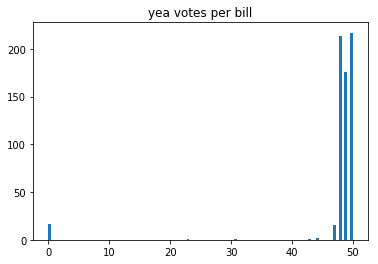

[625. 626. 568. 626. 626. 603. 626. 627. 567. 626. 626. 626. 626. 603.
 623. 626. 623. 626. 626. 515. 627. 626. 626. 626. 627. 567. 627. 626.
 627. 561. 593. 598. 623. 626. 621. 626. 627. 624. 627. 593. 624. 624.
 624. 625. 623. 624. 577. 625. 574. 578.]
(50,)


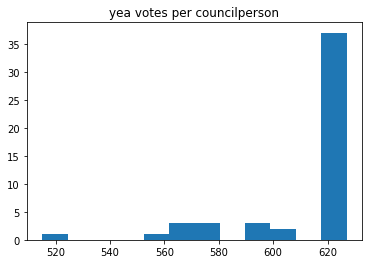

In [5]:
import matplotlib.pyplot as plt


consensus_list = np.sum(vote_matrix, 1)
print(consensus_list)
print(np.shape(consensus_list))
plt.figure()
plt.hist(consensus_list, bins='auto')  # 0 - vote entries are (at least in some cases) missing data
plt.title('yea votes per bill')
plt.show()

agreeable_index = np.sum(vote_matrix,0) # yes votes for a given candidate
print(agreeable_index)
print(np.shape(agreeable_index))
plt.figure()
plt.hist(agreeable_index, bins='auto')
plt.title('yea votes per councilperson')
plt.show()